In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, metrics, naive_bayes, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt  
from sklearn.model_selection import KFold

In [2]:
Corpus = pd.read_csv(r"corpus.csv")

In [3]:
# Step - a : Remove blank rows if any.
Corpus['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]
# Step - d : Remove Stop words, Nonr-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

Encoder = LabelEncoder()
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])

TfidfVectorizer(max_features=5000)

In [4]:
def evaluation(model, predictions):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(0, len(predictions)):
        a = predictions[i]
        b = Test_Y[i]
        if a == 1 and b == 1:
            TP += 1
        elif a == 0 and b == 1:
            FN += 1
        elif a == 1 and b == 0:
            FP += 1
        elif a == 0 and b == 0:
            TN += 1

    print(TP + FP + TN + FN == len(predictions) and len(predictions) == len(Test_Y))
    precision = TP / (TP + FP)
    #True Positive Rate (TPR) is a synonym for recall
    recall = TP / (TP + FN)
    #False Positive Rate (FPR)
    FPR = FP / (FP + TN)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("False Positive Rate (FPR): ", FPR)

    metrics.plot_roc_curve(model, Test_X_Tfidf, Test_Y)  
    plt.show()

1
Naive Bayes Accuracy Score 0.7449856733524355
True
Precision:  0.7405159332321699
Recall:  0.9858585858585859
False Positive Rate (FPR):  0.8423645320197044


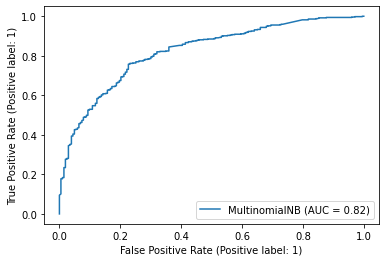

SVM Accuracy: 0.7879656160458453
True
Precision:  0.785831960461285
Recall:  0.9636363636363636
False Positive Rate (FPR):  0.6403940886699507


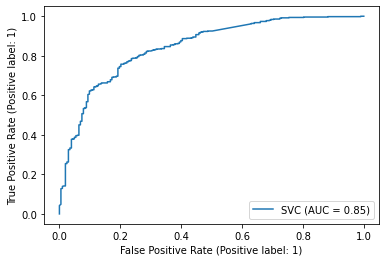

KNN Accuracy: 0.7263610315186246
True
Precision:  0.761168384879725
Recall:  0.8949494949494949
False Positive Rate (FPR):  0.6847290640394089


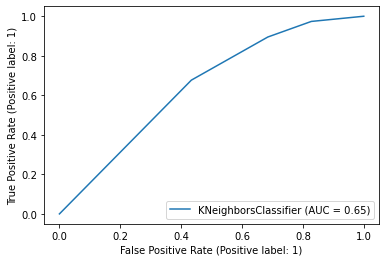

2
Naive Bayes Accuracy Score 0.7804878048780488
True
Precision:  0.7708978328173375
Recall:  0.9900596421471173
False Positive Rate (FPR):  0.7628865979381443


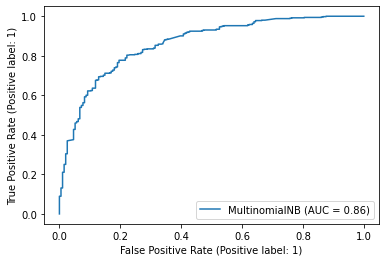

SVM Accuracy: 0.7991391678622669
True
Precision:  0.7951219512195122
Recall:  0.9721669980119284
False Positive Rate (FPR):  0.6494845360824743


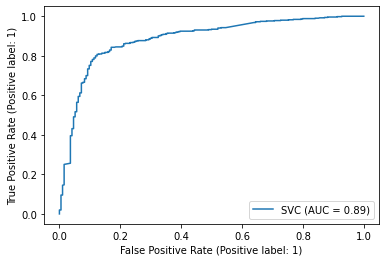

KNN Accuracy: 0.7130559540889526
True
Precision:  0.8650602409638555
Recall:  0.7137176938369781
False Positive Rate (FPR):  0.28865979381443296


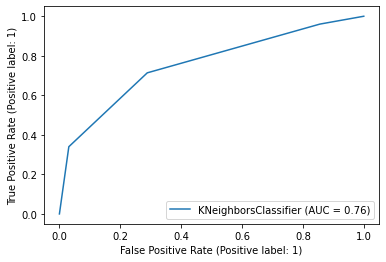

3
Naive Bayes Accuracy Score 0.8177905308464849
True
Precision:  0.8330708661417323
Recall:  0.9618181818181818
False Positive Rate (FPR):  0.7210884353741497


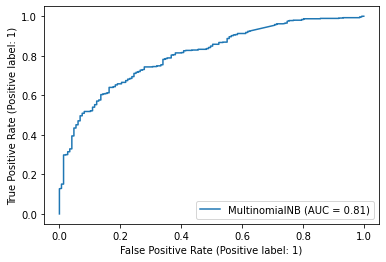

SVM Accuracy: 0.8134863701578192
True
Precision:  0.8804347826086957
Recall:  0.8836363636363637
False Positive Rate (FPR):  0.4489795918367347


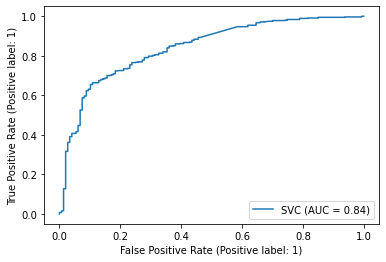

KNN Accuracy: 0.667144906743185
True
Precision:  0.9056122448979592
Recall:  0.6454545454545455
False Positive Rate (FPR):  0.25170068027210885


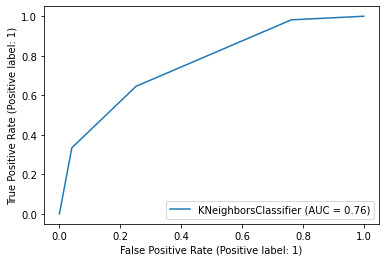

4
Naive Bayes Accuracy Score 0.7489239598278336
True
Precision:  0.7838709677419354
Recall:  0.9222011385199241
False Positive Rate (FPR):  0.788235294117647


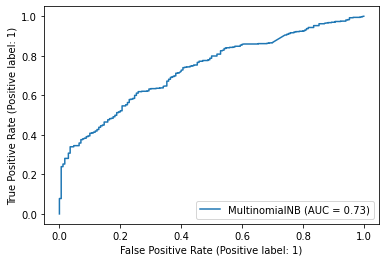

SVM Accuracy: 0.7474892395982783
True
Precision:  0.8292682926829268
Recall:  0.8387096774193549
False Positive Rate (FPR):  0.5352941176470588


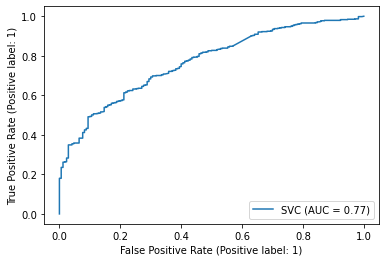

KNN Accuracy: 0.5710186513629842
True
Precision:  0.8392857142857143
Recall:  0.5351043643263758
False Positive Rate (FPR):  0.3176470588235294


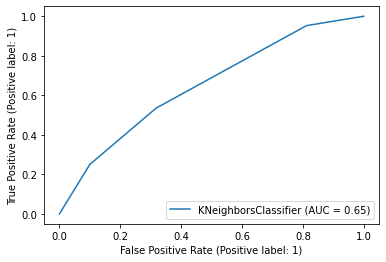

5
Naive Bayes Accuracy Score 0.7690100430416069
True
Precision:  0.7898894154818326
Recall:  0.946969696969697
False Positive Rate (FPR):  0.7869822485207101


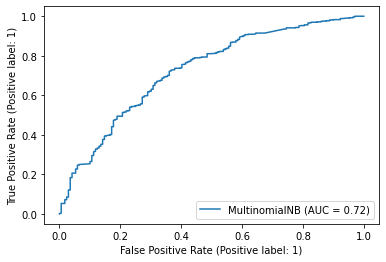

SVM Accuracy: 0.7948350071736011
True
Precision:  0.8407079646017699
Recall:  0.8996212121212122
False Positive Rate (FPR):  0.5325443786982249


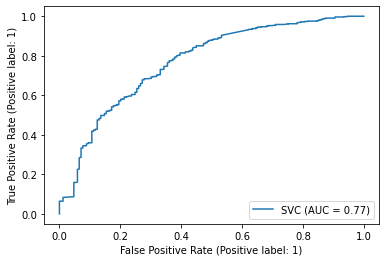

KNN Accuracy: 0.624103299856528
True
Precision:  0.8575268817204301
Recall:  0.6041666666666666
False Positive Rate (FPR):  0.3136094674556213


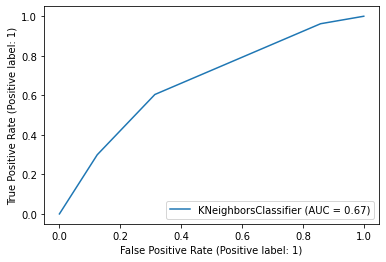

6
Naive Bayes Accuracy Score 0.6370157819225251
True
Precision:  0.6354992076069731
Recall:  0.9457547169811321
False Positive Rate (FPR):  0.8424908424908425


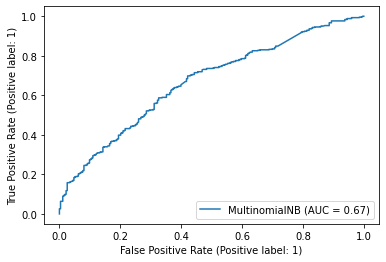

SVM Accuracy: 0.6470588235294118
True
Precision:  0.6765873015873016
Recall:  0.8042452830188679
False Positive Rate (FPR):  0.5970695970695971


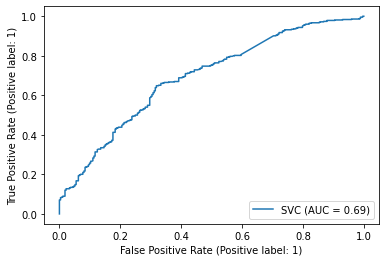

KNN Accuracy: 0.5853658536585366
True
Precision:  0.7089783281733746
Recall:  0.5400943396226415
False Positive Rate (FPR):  0.3443223443223443


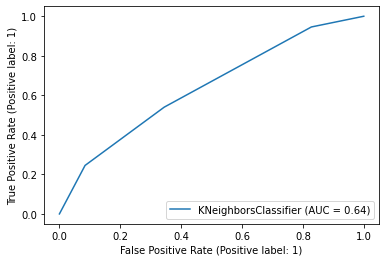

7
Naive Bayes Accuracy Score 0.8048780487804879
True
Precision:  0.8258785942492013
Recall:  0.9503676470588235
False Positive Rate (FPR):  0.7124183006535948


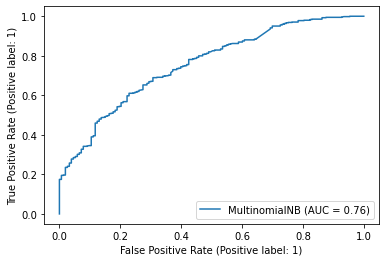

SVM Accuracy: 0.7733142037302726
True
Precision:  0.8600746268656716
Recall:  0.8474264705882353
False Positive Rate (FPR):  0.49019607843137253


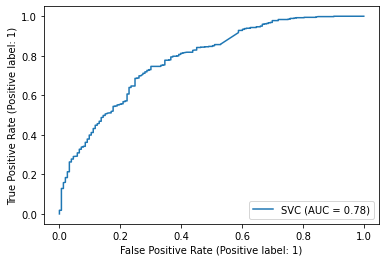

KNN Accuracy: 0.6097560975609756
True
Precision:  0.907185628742515
Recall:  0.5569852941176471
False Positive Rate (FPR):  0.20261437908496732


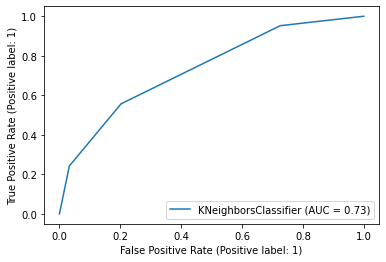

8
Naive Bayes Accuracy Score 0.667144906743185
True
Precision:  0.6572327044025157
Recall:  0.9675925925925926
False Positive Rate (FPR):  0.8226415094339623


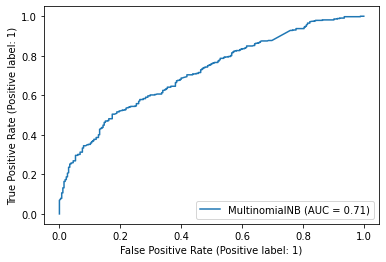

SVM Accuracy: 0.6987087517934003
True
Precision:  0.6927083333333334
Recall:  0.9236111111111112
False Positive Rate (FPR):  0.6679245283018868


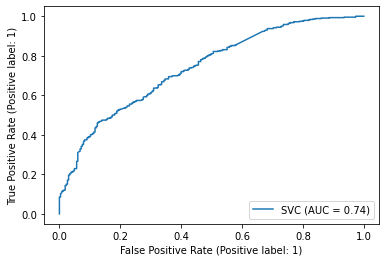

KNN Accuracy: 0.629842180774749
True
Precision:  0.7685185185185185
Recall:  0.5763888888888888
False Positive Rate (FPR):  0.2830188679245283


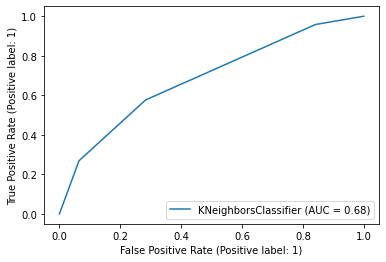

9
Naive Bayes Accuracy Score 0.672883787661406
True
Precision:  0.6844660194174758
Recall:  0.9276315789473685
False Positive Rate (FPR):  0.8091286307053942


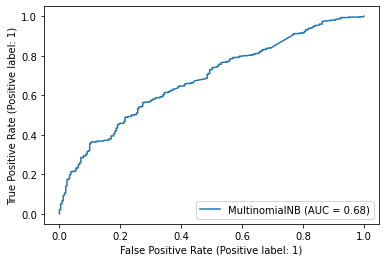

SVM Accuracy: 0.6829268292682927
True
Precision:  0.7412731006160165
Recall:  0.7916666666666666
False Positive Rate (FPR):  0.5228215767634855


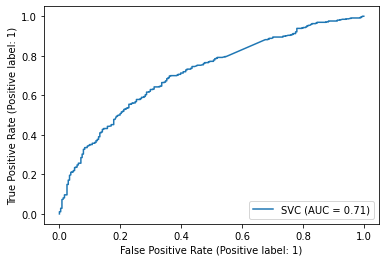

KNN Accuracy: 0.6327116212338594
True
Precision:  0.7777777777777778
Recall:  0.6140350877192983
False Positive Rate (FPR):  0.33195020746887965


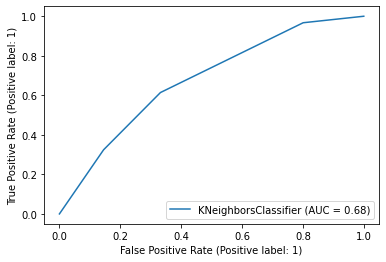

10
Naive Bayes Accuracy Score 0.6786226685796269
True
Precision:  0.6629032258064517
Recall:  0.9647887323943662
False Positive Rate (FPR):  0.7712177121771218


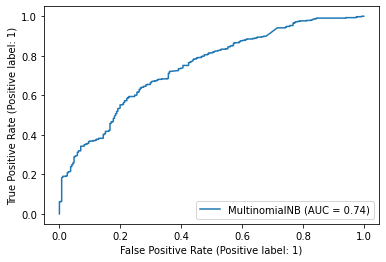

SVM Accuracy: 0.7187948350071736
True
Precision:  0.7121771217712177
Recall:  0.9061032863849765
False Positive Rate (FPR):  0.5756457564575646


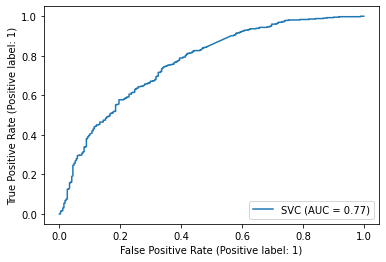

KNN Accuracy: 0.6470588235294118
True
Precision:  0.7601156069364162
Recall:  0.6173708920187794
False Positive Rate (FPR):  0.3062730627306273


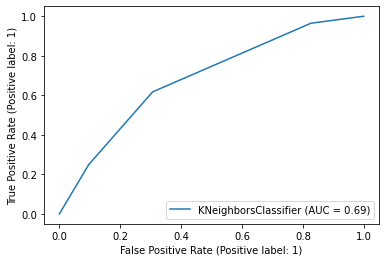

In [5]:
kf = KFold(n_splits=10)
kf.get_n_splits(Corpus['text_final'])

c = 0

for train_index, test_index in kf.split(Corpus['text_final']):
    Train_X, Test_X = Corpus['text_final'][train_index], Corpus['text_final'][test_index]
    Train_Y, Test_Y = Corpus['label'][train_index], Corpus['label'][test_index]
    
    Train_Y = Encoder.fit_transform(Train_Y)
    Test_Y = Encoder.fit_transform(Test_Y)
    
    Train_X_Tfidf = Tfidf_vect.transform(Train_X)
    Test_X_Tfidf = Tfidf_vect.transform(Test_X)

    c += 1
    print(c)
    
    # fit the training dataset on the NB classifier
    Naive = naive_bayes.MultinomialNB()
    Naive.fit(Train_X_Tfidf,Train_Y)
    # predict the labels on validation dataset
    predictions_NB = Naive.predict(Test_X_Tfidf)
    # Use accuracy_score function to get the accuracy
    print("Naive Bayes Accuracy Score",accuracy_score(predictions_NB, Test_Y))
    evaluation(Naive, predictions_NB)
    
    # fit the training dataset on the SVM classifier
    SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM.fit(Train_X_Tfidf,Train_Y)
    # predict the labels on validation dataset
    predictions_SVM = SVM.predict(Test_X_Tfidf)
    # Use accuracy_score function to get the accuracy
    print("SVM Accuracy:",accuracy_score(predictions_SVM, Test_Y))
    evaluation(SVM, predictions_SVM)
    
    # fit the training dataset on the KNN classifier
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(Train_X_Tfidf,Train_Y)
    # predict the labels on validation dataset
    predictions_KNN = KNN.predict(Test_X_Tfidf) 
    # Use accuracy_score function to get the accuracy
    print("KNN Accuracy:",accuracy_score(predictions_KNN, Test_Y))
    evaluation(KNN, predictions_KNN)